In [246]:
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt


import joblib

### Read data set with UQS and CQMs

In [ ]:

full_dataset_df = pd.read_csv('VGGFace2-200k-all.csv', sep=';')
train_set_df = pd.read_csv('VGGFace200k-random-state-36-train_set-only-filenames.csv', sep=';')
test_set_df = pd.read_csv('VGGFace200k-random-state-36-test_set-only-filenames.csv', sep=';')


C:\Users\admin\AppData\Local\Temp\ipykernel_21212\3867302570.py:1: DtypeWarning: Columns (15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  full_dataset_df = pd.read_csv('C:\\Users\\admin\\Desktop\\VGGFace2-200k-all.csv', sep=';')


### Inspect data

In [248]:
full_dataset_df.describe()

,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,CompressionArtifacts,...,LeftwardCropOfTheFaceImage.scalar,RightwardCropOfTheFaceImage.scalar,MarginAboveOfTheFaceImage.scalar,MarginBelowOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57
count,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,195788.000000,195788.000000,197684.000000,197684.000000,197684.000000,...,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,0.0
mean,21.231196,80.664214,0.411592,0.262675,0.022222,0.211277,0.000570,6.779410,39.379429,0.838543,...,99.949283,99.952181,49.640062,47.061239,86.040292,95.182974,95.729143,46.441513,91.646405,NaN
std,3.933268,74.322003,0.218670,0.116430,0.016821,0.209541,0.008520,0.629621,18.780816,0.076957,...,2.101427,2.008245,33.027875,23.085901,20.928868,10.167331,10.403484,28.569081,24.834834,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,18.226044,28.511613,0.242798,0.176984,0.010652,0.059145,0.000000,6.488656,42.000000,0.795383,...,100.000000,100.000000,16.000000,31.000000,82.000000,95.000000,96.000000,19.000000,100.000000,NaN
50%,21.227950,61.484994,0.427597,0.252320,0.018125,0.133240,0.000000,6.900752,47.000000,0.858716,...,100.000000,100.000000,55.000000,49.000000,96.000000,98.000000,99.000000,41.000000,100.000000,NaN
75%,24.228010,110.766834,0.590830,0.336969,0.028969,0.296119,0.000000,7.209606,47.000000,0.895513,...,100.000000,100.000000,80.000000,64.000000,99.000000,100.000000,100.000000,72.000000,100.000000,NaN
max,35.189240,2056.000000,1.000000,0.868540,0.189381,1.000000,0.660669,7.960028,50.000000,0.997724,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,NaN


In [249]:
full_dataset_df.dtypes

Filename                               object
UnifiedQualityScore                   float64
BackgroundUniformity                  float64
IlluminationUniformity                float64
LuminanceMean                         float64
LuminanceVariance                     float64
UnderExposurePrevention               float64
OverExposurePrevention                float64
DynamicRange                          float64
Sharpness                               int64
CompressionArtifacts                  float64
NaturalColour                         float64
SingleFacePresent                     float64
EyesOpen                              float64
MouthClosed                           float64
EyesVisible                            object
MouthOcclusionPrevention              float64
FaceOcclusionPrevention               float64
InterEyeDistance                      float64
HeadSize                              float64
LeftwardCropOfTheFaceImage            float64
RightwardCropOfTheFaceImage       

In [250]:

def convert_nanind_to_0(value):
    if value == '-nan(ind)':
        return 0
    else:
        return value

# Set EyesVisible.scalar score to the lowest value of 0
full_dataset_df['EyesVisible.scalar'] = full_dataset_df['EyesVisible.scalar'].apply(lambda x: convert_nanind_to_0(x))
full_dataset_df['EyesVisible.scalar'] = full_dataset_df['EyesVisible.scalar'].astype(int)


In [251]:
pd.DataFrame(full_dataset_df.isnull().sum().sort_values(ascending=False))

,0
Unnamed: 57,197684
UnderExposurePrevention,1896
OverExposurePrevention,1896
InterEyeDistance,167
BackgroundUniformity,0
UnifiedQualityScore,0
LuminanceVariance,0
LuminanceMean,0
DynamicRange,0
Filename,0


## Choose to work with native or scalar scores and measures

In [252]:
# Save dataframe with filenames before dropping columns
test_set_filenames_df = pd.DataFrame(data=test_set_df["Filename"])




In [253]:
# Predict scalar UQS based on scalar CQMs
columns_to_drop = ['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
       'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
       'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
       'Sharpness', 'CompressionArtifacts', 'NaturalColour',
       'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
       'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
       'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
       'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
       'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
       'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57']


# Also drop CQMs that are not in landmarked region
# columns_to_drop.append(['BackgroundUniformity.scalar', 'SingleFacePresent.scalar',
#        'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar',  'NoHeadCoverings.scalar'])

In [254]:
ablation_name = "All"
ablation_columns_to_drop = [
]



# ablation_name = "Top-24"
# ablation_columns_to_drop = [
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]




# ablation_name = "Top-20"
# ablation_columns_to_drop = [
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar',
# ]




# ablation_name = "Top-15"
# ablation_columns_to_drop = [
#     'MouthClosed.scalar',
#     'OverExposurePrevention.scalar',
#     'NaturalColour.scalar',
#     'MarginBelowOfTheFaceImage.scalar',
#     'Sharpness.scalar',
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]



# ablation_name = "Top-10"
# ablation_columns_to_drop = [
#     'IlluminationUniformity.scalar',
#     'UnderExposurePrevention.scalar',
#     'NoHeadCoverings.scalar',
#     'LuminanceVariance.scalar',
#     'SingleFacePresent.scalar',
#     'MouthClosed.scalar',
#     'OverExposurePrevention.scalar',
#     'NaturalColour.scalar',
#     'MarginBelowOfTheFaceImage.scalar',
#     'Sharpness.scalar',
#     'HeadSize.scalar',
#     'CompressionArtifacts.scalar',
#     'RightwardCropOfTheFaceImage.scalar',
#     'LeftwardCropOfTheFaceImage.scalar',
#     'MarginAboveOfTheFaceImage.scalar',
#     'BackgroundUniformity.scalar',
#     'ExpressionNeutrality.scalar'
# ]








columns_to_drop = columns_to_drop + ablation_columns_to_drop


# === CQMs ordered by pAUC from lowest to highest ===

# 'FaceOcclusionPrevention.scalar',
# 'EyesVisible.scalar',
# 'HeadPoseYaw.scalar',
# 'MouthOcclusionPrevention.scalar',
# 'HeadPosePitch.scalar',
# 'EyesOpen.scalar',
# 'HeadPoseRoll.scalar',
# 'InterEyeDistance.scalar',
# 'DynamicRange.scalar',
# 'LuminanceMean.scalar',
# 'IlluminationUniformity.scalar',
# 'UnderExposurePrevention.scalar',
# 'NoHeadCoverings.scalar',
# 'LuminanceVariance.scalar',
# 'SingleFacePresent.scalar',
# 'MouthClosed.scalar',
# 'OverExposurePrevention.scalar',
# 'NaturalColour.scalar',
# 'MarginBelowOfTheFaceImage.scalar',
# 'Sharpness.scalar',
# 'HeadSize.scalar',
# 'CompressionArtifacts.scalar',
# 'RightwardCropOfTheFaceImage.scalar',
# 'LeftwardCropOfTheFaceImage.scalar',
# 'MarginAboveOfTheFaceImage.scalar',
# 'BackgroundUniformity.scalar',
# 'ExpressionNeutrality.scalar'


In [255]:
full_dataset_df = full_dataset_df.drop(columns=columns_to_drop)
train_set_df = train_set_df.drop(columns=columns_to_drop)
test_set_df = test_set_df.drop(columns=columns_to_drop)

## Feature engineering

Various things were tried. None of them seem to improve performance.

In [256]:
# train_df['MeanCropScore'] = (train_df['LeftwardCropOfTheFaceImage'] + train_df['RightwardCropOfTheFaceImage']) / 2
# train_df['MeanCropScore.scalar'] = (train_df['LeftwardCropOfTheFaceImage.scalar'] + train_df['RightwardCropOfTheFaceImage.scalar']) / 2

In [257]:
# train_df['MeanCropScore'].head(15)
# train_df['MeanCropScore.scalar'].head(15)

In [258]:
# train_df['MeanMarginScore'] = (train_df['MarginBelowOfTheFaceImage'] + train_df['MarginAboveOfTheFaceImage']) / 2
# train_df['MeanMarginScore.scalar'] = (train_df['MarginBelowOfTheFaceImage.scalar'] + train_df['MarginAboveOfTheFaceImage.scalar']) / 2


In [259]:
# train_df['MeanMarginScore'].head(15)
# train_df['MeanMarginScore.scalar'].head(15)

## Check correlations and drop some correlated features

In [260]:
# correlations = full_dataset_df.corr()
# plt.figure(figsize=(19,10))
# sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

In [261]:
# FaceOcclusionPrevention or EyesVisible and MouthOcclusionPrevention?
# Remove ExpressionNeutrality or the ones it correlates with?
# train_df = train_df.drop(columns=['DynamicRange', 'HeadSize',
#                                   'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 
#                                   'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage'])
# train_df = train_df.drop(columns=['DynamicRange.scalar', 'HeadSize.scalar',
#                                   'LeftwardCropOfTheFaceImage.scalar', 'RightwardCropOfTheFaceImage.scalar', 
#                                   'MarginAboveOfTheFaceImage.scalar', 'MarginBelowOfTheFaceImage.scalar'])

<Axes: >

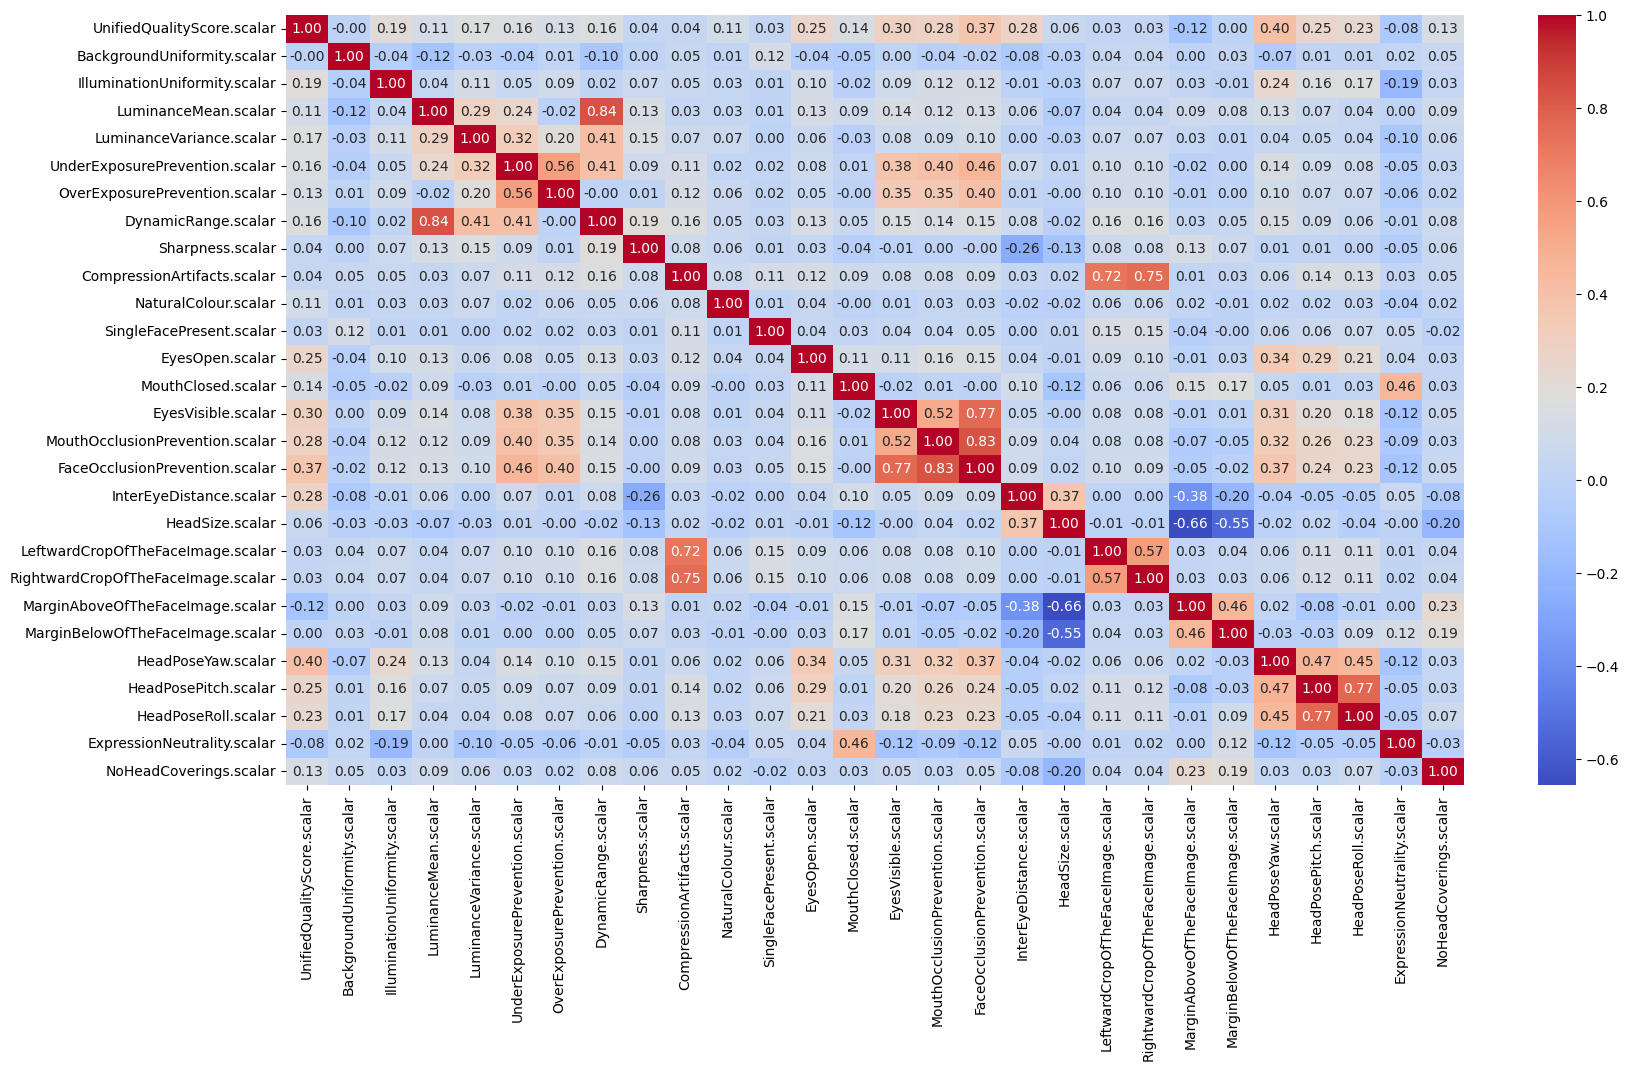

In [262]:
corr_after_drop = full_dataset_df.corr()
plt.figure(figsize=(19,10))
sns.heatmap(corr_after_drop, annot=True, cmap='coolwarm', fmt=".2f")

## UQS histogram

<Axes: xlabel='UnifiedQualityScore.scalar', ylabel='Count'>

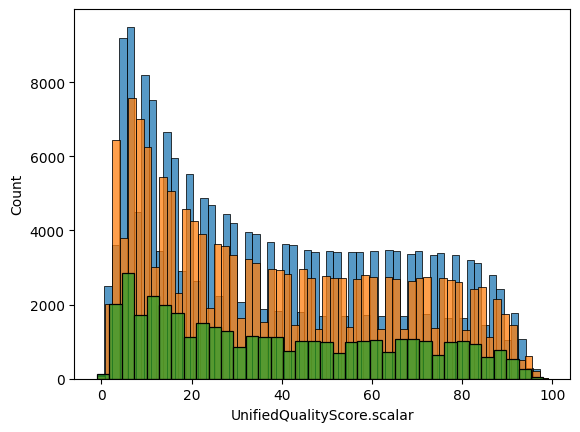

In [263]:
sns.histplot(
    full_dataset_df,
    x=full_dataset_df['UnifiedQualityScore.scalar']
)

sns.histplot(
    train_set_df,
    x=train_set_df['UnifiedQualityScore.scalar']
)


sns.histplot(
    test_set_df,
    x=test_set_df['UnifiedQualityScore.scalar']
)

# Split training data into high quality and low quality classes

15000 images with a UQS higher than or equal to 80 are randomly chosen and used as the high quality images.
15000 images with a UQS greater than or equal to 0 and lower than or equal to 20 are randomly chosen and used as the low quality images.

In [264]:
train_set_df["UnifiedQualityScore.scalar"].describe()

count    158180.000000
mean         38.506398
std          26.999046
min          -1.000000
25%          14.000000
50%          34.000000
75%          61.000000
max          99.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [265]:
print(train_set_df["UnifiedQualityScore.scalar"].quantile(0.9))
print(train_set_df["UnifiedQualityScore.scalar"].quantile(0.1))

79.0
6.0


In [266]:
high_uqs_minimum = 51
low_uqs_minimum = 10
low_uqs_maximum = 50
high_quality_images_df = train_set_df[train_set_df["UnifiedQualityScore.scalar"].apply(lambda x: x >= high_uqs_minimum)]
low_quality_images_df = train_set_df[train_set_df["UnifiedQualityScore.scalar"].apply(lambda x: x >= low_uqs_minimum and x <= low_uqs_maximum)]

high_quality_images_df = pd.DataFrame(data=high_quality_images_df)
low_quality_images_df = pd.DataFrame(data=low_quality_images_df)

print(high_quality_images_df.describe())
print(low_quality_images_df.describe())

       UnifiedQualityScore.scalar  BackgroundUniformity.scalar  \
count                54570.000000                 54570.000000   
mean                    70.856001                    66.473374   
std                     12.053003                    24.203864   
min                     51.000000                    -1.000000   
25%                     60.000000                    50.000000   
50%                     71.000000                    71.000000   
75%                     81.000000                    87.000000   
max                     99.000000                   100.000000   

       IlluminationUniformity.scalar  LuminanceMean.scalar  \
count                   54570.000000          54570.000000   
mean                       76.289976             68.943889   
std                        15.303715             28.224723   
min                         0.000000              3.000000   
25%                        70.000000             47.000000   
50%                        80.000

In [267]:

high_quality_df = high_quality_images_df.sample(n=15000, random_state=36)
low_quality_df = low_quality_images_df.sample(n=15000, random_state=36)

high_quality_df['QualityClass'] = 1
low_quality_df['QualityClass'] = 0

combined_df = pd.concat([high_quality_df, low_quality_df], ignore_index=True)

print(combined_df)

       UnifiedQualityScore.scalar  BackgroundUniformity.scalar  \
0                              54                           78   
1                              62                           51   
2                              70                           67   
3                              80                           69   
4                              61                           87   
...                           ...                          ...   
29995                          35                           81   
29996                          27                           90   
29997                          39                           64   
29998                          32                           84   
29999                          43                           47   

       IlluminationUniformity.scalar  LuminanceMean.scalar  \
0                                 90                    98   
1                                 91                    24   
2                    

# Preprocessing

In [268]:
column_names = combined_df.select_dtypes(include=['int64', 'float64']).columns
column_names = column_names.drop(['UnifiedQualityScore.scalar', 'QualityClass'])

In [269]:
# Impute to fill missing values. Might not be necessary...
impute_and_scale_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [270]:
columns_transformed = ColumnTransformer(transformers=[
    ('num_p', impute_and_scale_pipeline, column_names)
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [271]:
preprocess_pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformed)
])

In [272]:
X = combined_df.drop(['UnifiedQualityScore.scalar', 'QualityClass'], axis=1)
y = combined_df['QualityClass']

test_set_X = test_set_df.drop(['UnifiedQualityScore.scalar'], axis=1)

In [273]:
X_preprocessed = preprocess_pipeline.fit_transform(X)
test_set_X_preprocessed = preprocess_pipeline.fit_transform(test_set_X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=36)

In [274]:
y_test.sum() # there are 3027 high quality images vs. 2973 low quality images

np.int64(3027)

# Training

In [275]:
random_forest_classifier = RandomForestClassifier(random_state=36)

In [276]:
# Create grid for RandomSearchCV

# For running multiple randomized search grids. So some can be very specific with only one possible set of parameters, and the model for that option will be saved,
# and the predicted UQS using that model will be saved
randomized_search_grids_dictionary = {} # Structure: Level 1 - Name of randomized search grid,    Level 2 - randomized search grid


# See randomized-search-settings-RFR.txt for more settings used



# === SPECIFIC FINAL 11 ===
# Results:
n_estimators = [200] 
max_depth = [30]
max_features = ["sqrt"]
min_samples_leaf = [16]
min_samples_split = [32]
bootstrap = [False]

randomized_search_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
randomized_search_grids_dictionary["SPECIFIC_FINAL_11"] = randomized_search_grid





In [277]:
def search_grid_and_save_model_and_results(randomized_search_grid, random_forest_classifier, X_train, y_train, cv_folds, model_name, ablation_name): 
    random_forest_cross_val = RandomizedSearchCV(estimator = random_forest_classifier, 
                                             param_distributions = randomized_search_grid,
                                             n_iter = 30,
                                             cv = cv_folds,
                                             verbose=3,
                                             random_state=36,
                                             n_jobs = -1)
    
    random_forest_cross_val.fit(X_train, y_train)
    
    results_of_randomized_search_cv = pd.DataFrame(random_forest_cross_val.cv_results_)
    results_of_randomized_search_cv.to_csv(f"./results_of_RandomizedSearchCVs/results_of_randomized_search_cv-RFC-{model_name}-{ablation_name}.csv", sep=';')

    model_filepath = f"./models/RFC_UQS_scalar_to_scalar_{model_name}-{ablation_name}_VGGFace-200k.pkl"
    joblib.dump(random_forest_cross_val, model_filepath)

    return random_forest_cross_val

    

In [278]:
def compute_UQS_and_save(model, X_test_set, model_name, filenames_df, ablation_name):
    test_set_y_pred_proba = model.predict_proba(X_test_set)
    
    filenames_df_copy = filenames_df.copy(deep=True)
    filenames_df_copy["UQS"] = test_set_y_pred_proba[:, 1] * 100
    filenames_df_copy["UQS"] = filenames_df_copy["UQS"].apply(lambda x: round(x)).astype(int)

    filenames_df_copy[["Filename", "UQS"]].to_csv(f'./predicted_UQS_files/Predicted-UQS-RFC-{model_name}-{ablation_name}-Test_set-VGGFace200k.csv', index=False, sep=';')

In [279]:
def evaluate_model(model, X_test, y_test, model_name, ablation_name):
    score = model.score(X_test, y_test)
    score_df = pd.DataFrame(data=[score])
    score_df.columns = ["MeanAccuracy"]
    score_df.to_csv(f"RFC-evaluations/RFC-evaluation-{model_name}-{ablation_name}.csv", sep=';', index=False)
    

In [280]:
def plot_feature_importance(feature_importances_df, filepath_png, setting_name, ablation_name, threshold = None):
    fig, ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    plt.subplots_adjust(bottom=0.4) # get labels to not be cut off
    ax.bar(feature_importances_df["feature"], feature_importances_df["feature_importance"])
    plt.xticks(rotation=45, ha='right')
    ax.set_ylabel('Feature importance')
    ax.set_title(f'Feature importances for RFC-{setting_name}-{ablation_name}')
    plt.savefig(filepath_png)
    plt.clf()


    


In [281]:
def save_feature_importances(model, feature_names, setting_name, ablation_name):
    feature_importances_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_, 'feature': feature_names})
    feature_importances_df = feature_importances_df.sort_values('feature_importance', ascending = False)
    filepath_csv = f"feature_importances/RFC-{ablation_name}/RFC-feature-importances-{setting_name}-{ablation_name}.csv"
    filepath_png = filepath_csv.replace("csv", "png")
    feature_importances_df.to_csv(filepath_csv, sep=';', index=False)
    plot_feature_importance(feature_importances_df, filepath_png, setting_name, ablation_name)
    

In [282]:
for setting_name, rs_grid in randomized_search_grids_dictionary.items():
    search_result = search_grid_and_save_model_and_results(rs_grid, random_forest_classifier, X_train, y_train, 5, setting_name, ablation_name)
    evaluate_model(search_result.best_estimator_, X_test, y_test, setting_name, ablation_name)
    compute_UQS_and_save(search_result.best_estimator_, test_set_X_preprocessed, setting_name, test_set_filenames_df, ablation_name)
    save_feature_importances(search_result.best_estimator_, full_dataset_df.drop(columns=['UnifiedQualityScore.scalar']).columns, setting_name, ablation_name)



c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


<Figure size 1200x600 with 0 Axes>